In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Data acquisition of the movies dataset
df_movie=pd.read_csv('/content/movies.csv', sep = '::', engine='python',encoding='latin-1')
df_movie.columns =['MovieIDs','MovieName','Category']
df_movie.dropna(inplace=True)
df_movie.head()

,MovieIDs,MovieName,Category
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [ ]:
df_movie.shape

(3882, 3)

In [ ]:
df_movie.describe()

,MovieIDs
count,3882.000000
mean,1986.560793
std,1146.483260
min,2.000000
25%,983.250000
50%,2010.500000
75%,2980.750000
max,3952.000000


In [ ]:
df_movie.isna().sum()

MovieIDs     0
MovieName    0
Category     0
dtype: int64

**RATINGS DATA**

In [ ]:
df_rating=pd.read_csv('/content/ratings.csv', sep = '::', engine='python')
df_rating.columns =['ID','MovieID','Ratings','TimeStamp']
df_rating.dropna(inplace=True)
df_rating.head()

,ID,MovieID,Ratings,TimeStamp
0,1,661.0,3.0,978302109.0
1,1,914.0,3.0,978301968.0
2,1,3408.0,4.0,978300275.0
3,1,2355.0,5.0,978824291.0
4,1,1197.0,3.0,978302268.0


In [ ]:
df_rating.shape

(88828, 4)

In [ ]:
df_rating.describe()

,ID,MovieID,Ratings,TimeStamp
count,88828.000000,88828.000000,88828.000000,8.882800e+04
mean,300.295166,1859.275555,3.614333,9.798852e+08
std,167.460634,1105.716252,1.113636,1.050616e+07
min,1.000000,1.000000,1.000000,9.759447e+08
25%,162.000000,1017.000000,3.000000,9.762933e+08
50%,302.000000,1792.000000,4.000000,9.768111e+08
75%,445.000000,2770.000000,4.000000,9.779718e+08
max,587.000000,3952.000000,5.000000,1.046389e+09


In [ ]:
df_rating.isna().sum()

ID           0
MovieID      0
Ratings      0
TimeStamp    0
dtype: int64

**USERS DATA**

In [ ]:
df_users=pd.read_csv("/content/users.csv", sep="::", engine="python")
df_users.columns =['UserID','Gender','Age','Occupation','Zip-code']
df_users.dropna(inplace=True)
df_users.head(10)


,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117
5,7,M,35,1,06810
6,8,M,25,12,11413
7,9,M,25,17,61614
8,10,F,35,1,95370
9,11,F,25,1,04093


In [ ]:
df_users.shape

(6039, 5)

In [ ]:
df_users.describe()

,UserID,Age,Occupation
count,6039.000000,6039.000000,6039.000000
mean,3021.000000,30.644146,8.146547
std,1743.453469,12.891387,6.329991
min,2.000000,1.000000,0.000000
25%,1511.500000,25.000000,3.000000
50%,3021.000000,25.000000,7.000000
75%,4530.500000,35.000000,14.000000
max,6040.000000,56.000000,20.000000


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

df_users["Gender"]= labelencoder.fit_transform(df_users['Gender'])
df_users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,2,1,56,16,70072
1,3,1,25,15,55117
2,4,1,45,7,02460
3,5,1,25,20,55455
4,6,0,50,9,55117


In [ ]:
df_users.isna().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

**Concatenation of dataset**

In [ ]:
df_data=pd.concat([df_movie,df_rating,df_users], axis=1)
df_data.dropna()
df_data.head(10)

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661.0,3.0,978302109.0,2.0,1.0,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914.0,3.0,978301968.0,3.0,1.0,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408.0,4.0,978300275.0,4.0,1.0,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355.0,5.0,978824291.0,5.0,1.0,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197.0,3.0,978302268.0,6.0,0.0,50.0,9.0,55117
5,7.0,Sabrina (1995),Comedy|Romance,1,1287.0,5.0,978302039.0,7.0,1.0,35.0,1.0,06810
6,8.0,Tom and Huck (1995),Adventure|Children's,1,2804.0,5.0,978300719.0,8.0,1.0,25.0,12.0,11413
7,9.0,Sudden Death (1995),Action,1,594.0,4.0,978302268.0,9.0,1.0,25.0,17.0,61614
8,10.0,GoldenEye (1995),Action|Adventure|Thriller,1,919.0,4.0,978301368.0,10.0,0.0,35.0,1.0,95370
9,11.0,"American President, The (1995)",Comedy|Drama|Romance,1,595.0,5.0,978824268.0,11.0,0.0,25.0,1.0,04093


In [ ]:
 df_data.shape

(88828, 12)

**Dropping unnecessary columns**

In [ ]:
df2=df_data.drop(["Occupation","Zip-code","TimeStamp"], axis=1)
df2.head()

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,UserID,Gender,Age
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661.0,3.0,2.0,1.0,56.0
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914.0,3.0,3.0,1.0,25.0
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408.0,4.0,4.0,1.0,45.0
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355.0,5.0,5.0,1.0,25.0
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197.0,3.0,6.0,0.0,50.0


In [ ]:
df2.describe()

,MovieIDs,ID,MovieID,Ratings,UserID,Gender,Age
count,3882.000000,88828.000000,88828.000000,88828.000000,6039.000000,6039.000000,6039.000000
mean,1986.560793,300.295166,1859.275555,3.614333,3021.000000,0.717172,30.644146
std,1146.483260,167.460634,1105.716252,1.113636,1743.453469,0.450411,12.891387
min,2.000000,1.000000,1.000000,1.000000,2.000000,0.000000,1.000000
25%,983.250000,162.000000,1017.000000,3.000000,1511.500000,0.000000,25.000000
50%,2010.500000,302.000000,1792.000000,4.000000,3021.000000,1.000000,25.000000
75%,2980.750000,445.000000,2770.000000,4.000000,4530.500000,1.000000,35.000000
max,3952.000000,587.000000,3952.000000,5.000000,6040.000000,1.000000,56.000000


In [ ]:
df2.isna().sum()

MovieIDs     84946
MovieName    84946
Category     84946
ID               0
MovieID          0
Ratings          0
UserID       82789
Gender       82789
Age          82789
dtype: int64

**Handling missing values**

In [ ]:
 df_final=df2.dropna()
 df_final.shape

(3882, 9)

**Visualization of data**

<Axes: xlabel='Gender', ylabel='count'>

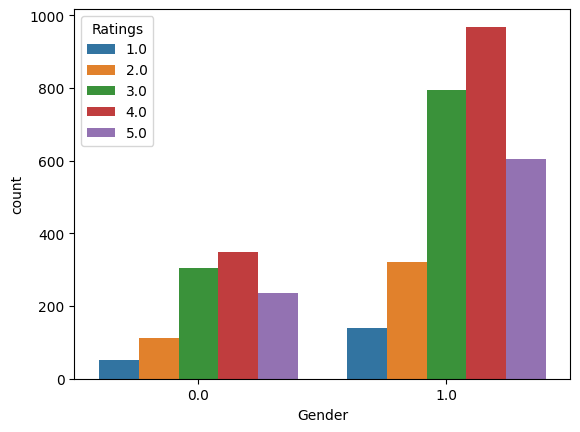

In [ ]:
sns.countplot(x=df_final["Gender"], hue=df_final["Ratings"])

Text(0.5, 0, 'Ratings')

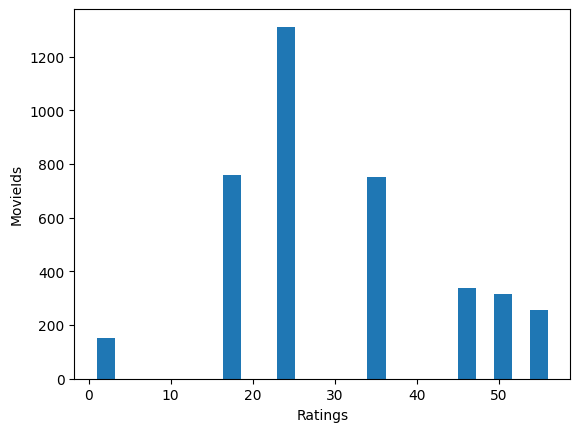

In [ ]:
df_final.Age.plot.hist(bins=25)
plt.ylabel("MovieIds")
plt.xlabel("Ratings")

<Axes: ylabel='Frequency'>

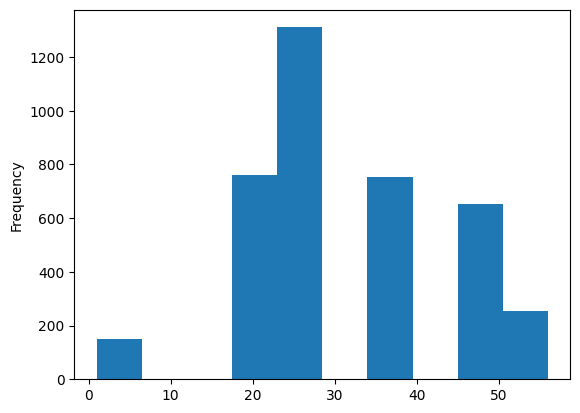

In [ ]:
df_final["Age"].plot.hist(bins=10)

<Axes: xlabel='Age', ylabel='count'>

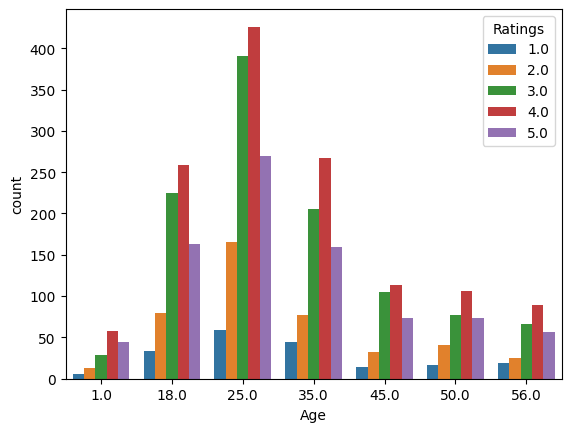

In [ ]:
sns.countplot(x=df_final["Age"], hue=df_final["Ratings"])

**Final Dataset**

In [ ]:
df_final.head()

,MovieIDs,MovieName,Category,ID,MovieID,Ratings,UserID,Gender,Age
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661.0,3.0,2.0,1.0,56.0
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914.0,3.0,3.0,1.0,25.0
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408.0,4.0,4.0,1.0,45.0
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355.0,5.0,5.0,1.0,25.0
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197.0,3.0,6.0,0.0,50.0


In [ ]:
input=df_final.drop(["Ratings", "MovieName","Category", "MovieIDs"], axis=1)
target=df_final["Ratings"]

In [ ]:
target.head()


0    3.0
1    3.0
2    4.0
3    5.0
4    3.0
Name: Ratings, dtype: float64

In [ ]:
input.head()

,ID,MovieID,UserID,Gender,Age
0,1,661.0,2.0,1.0,56.0
1,1,914.0,3.0,1.0,25.0
2,1,3408.0,4.0,1.0,45.0
3,1,2355.0,5.0,1.0,25.0
4,1,1197.0,6.0,0.0,50.0


**Model Training using Logistic Regression**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(input)
scaled_df = pd.DataFrame(scaled_data,
                         columns=input.columns)

scaled_df.head()

,ID,MovieID,UserID,Gender,Age
0,0.0,0.167046,0.000000,1.0,1.000000
1,0.0,0.231081,0.000258,1.0,0.436364
2,0.0,0.862313,0.000515,1.0,0.800000
3,0.0,0.595799,0.000773,1.0,0.436364
4,0.0,0.302708,0.001031,0.0,0.890909


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(input,target,test_size=0.3)

In [ ]:
print(Y_train)


2317    2.0
3210    4.0
2131    4.0
2936    3.0
3408    4.0
       ... 
2010    2.0
1506    4.0
494     3.0
235     4.0
2896    2.0
Name: Ratings, Length: 2717, dtype: float64


In [ ]:
print(Y_test)

1348    4.0
120     3.0
1237    1.0
1325    2.0
388     4.0
       ... 
2063    3.0
3283    5.0
2449    3.0
739     2.0
1412    3.0
Name: Ratings, Length: 1165, dtype: float64


In [ ]:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=100000)
model.fit(X_train,Y_train)

LogisticRegression(max_iter=100000)

In [ ]:
X_test = np.array(X_test)

In [ ]:
model.predict(X_test)

In [ ]:
print(Y_test)